<a href="https://colab.research.google.com/github/hochaeAidl/ai-middle-course/blob/master/02_06_Image_basic_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 2-6: Image Processing
> ## Image Augmentation

## Module import

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# tf.keras.preprocessing.image import
import tensorflow.keras as keras 

TensorFlow 2.x selected.


## get image from flower photos

### image load

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7F8E665D5F98>


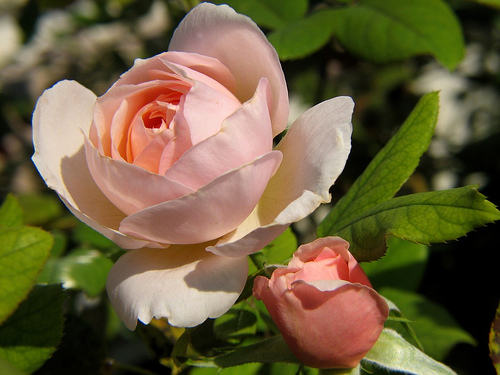

In [14]:
# URL에서 이미지 읽어와서 준비 
import pathlib
data_dir = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    fname='flower_photos', untar=True)
data_dir_tf = pathlib.Path(data_dir)
#print (data_dir_tf)

roses = list(data_dir_tf.glob('roses/*'))
img = keras.preprocessing.image.load_img(roses[0]) 

print(img)
img



### image processing function
#### -- inputs
>dg: ImageDataGenerator   
>imgs: image tensor


In [0]:
# image data generator로 부터 image를 받아서 출력 
def k_image_process(dg, imgs):
  # batch_size 만큼씩 처리하도록 준비
  it = dg.flow(imgs, batch_size=1)
  print(len(it))
  plt.figure(figsize=(12,9))
  # generate samples and plot
  for i in range(12):
    # define subplot
    plt.subplot(4,3,i+1) # 이미지를 4행 3열로 배치해준다.
    #batch_size씩 가져옴
    batch = it.next()
    print(batch.shape)
    # plt을 위해 type 변경 
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
  # show the figure
  plt.show()

### image preprocessing: 3-dim to 4-dim array



In [16]:
# ImageDataGenerator()에 넣을 수 있도록 (bs,v,h,c)로 변환
# convert to numpy array
data = keras.preprocessing.image.img_to_array(img)
print(type(data), data.shape)
# expand dimension to one sample
batch_image = np.expand_dims(data, 0)
print(type(batch_image), batch_image.shape)

<class 'numpy.ndarray'> (375, 500, 3)
<class 'numpy.ndarray'> (1, 375, 500, 3)


## Image Augmentations

### horisontal shifting: `width_shift_range` 

1
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)


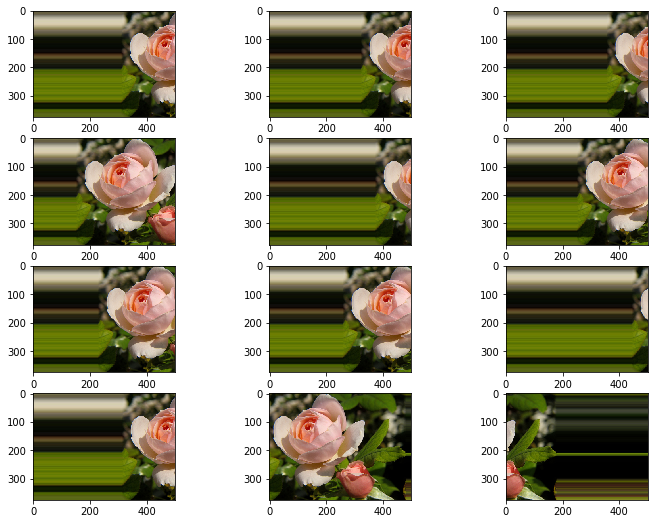

In [5]:
# width_shift_range
datagen = keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.9)

k_image_process(datagen, batch_image)

### virtical shifting: `height_shift_range`

1
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)


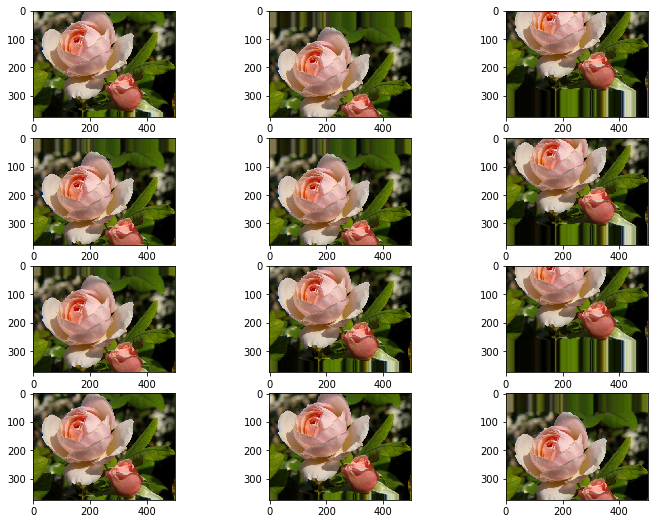

In [6]:
# height_shift_range
datagen = keras.preprocessing.image.ImageDataGenerator(height_shift_range=0.3)
k_image_process(datagen, batch_image)

### Image flip: `horizontal_flip/vertical_flip`

1
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)


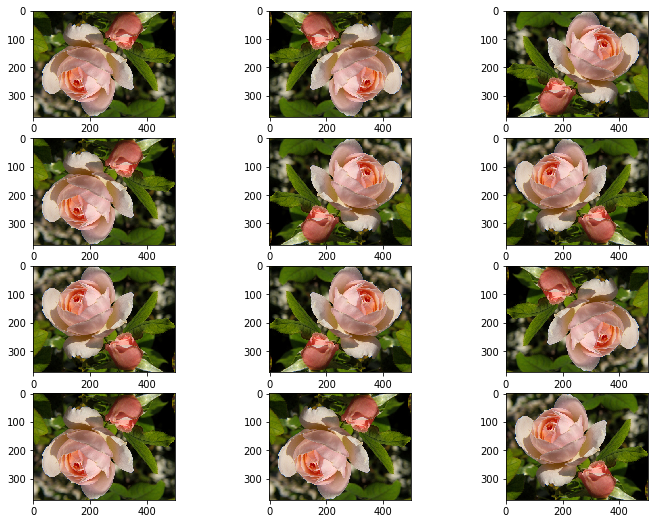

In [7]:
# flip
datagen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
k_image_process(datagen, batch_image)

### Image 회전: `rotation_range`

1
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)


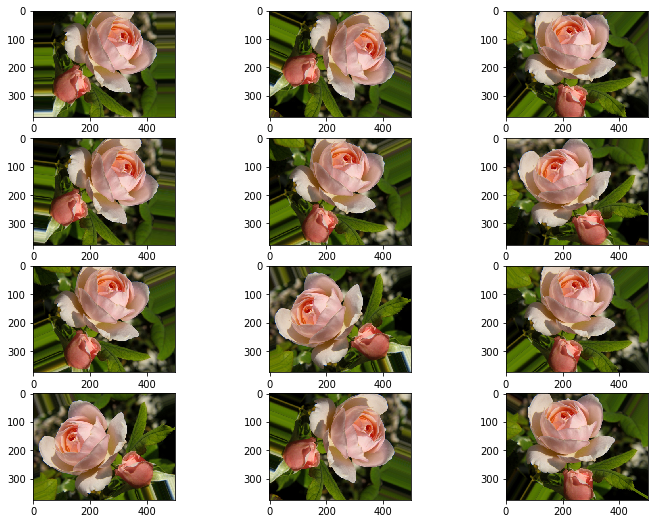

In [8]:
# rotation
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=120)
k_image_process(datagen, batch_image)

Image 확대/축소: `zoom_range`

1
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)


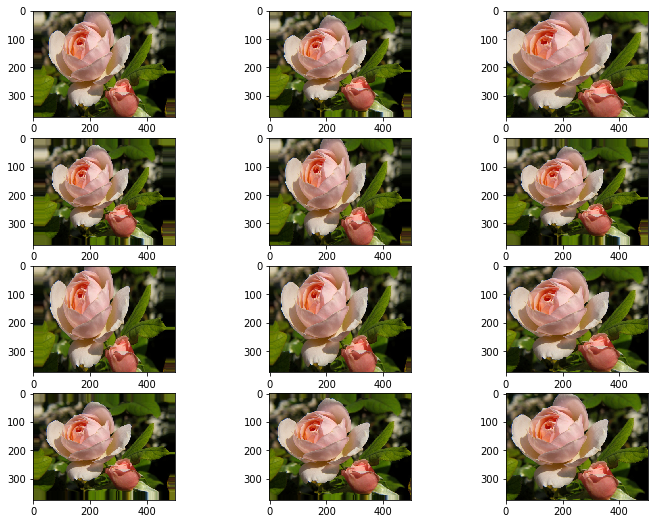

In [9]:
# zoom_range
## zoom_range=0.2 : +-20% 이내에서 random 
## zoom_range=[0.8,1.2] : 80% ~ 120% --> 100% 로 random
datagen = keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2) # zoom_range=[0.8,1.2]
k_image_process(datagen, batch_image)

### Image 밝기 변환: `brightness_range`

1
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)


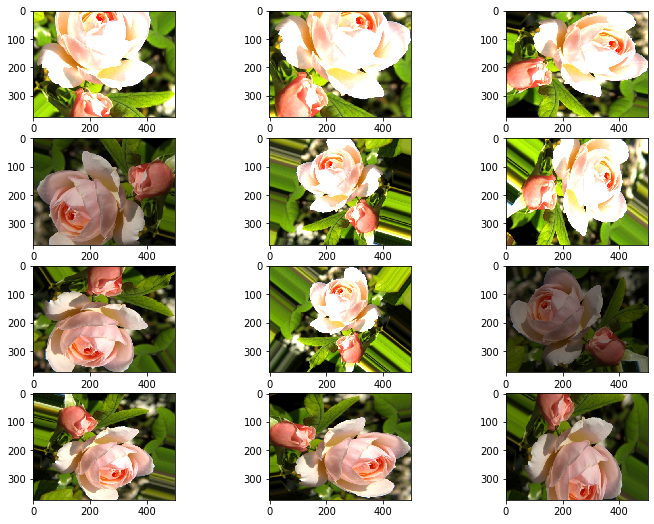

In [10]:
# create image data augmentation generator
datagen = keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.5,2.0], zoom_range=0.3, rotation_range=180, horizontal_flip=True)
k_image_process(datagen, batch_image)

## **실습 과제**

### 과제 1. `ImageDataGenerator()`의 option 값들 바꾸어 결과를 확인하자
### 과제 2. `ImageDataGenerator()`에 여러 option을 넣어 동시에 작동하도록 해보자
###  -- `k_image_process()`를 수정하여 4x3 으로 이미지를 출력해 보자 
#### -- 결과를 확인 하자 : 



1
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)


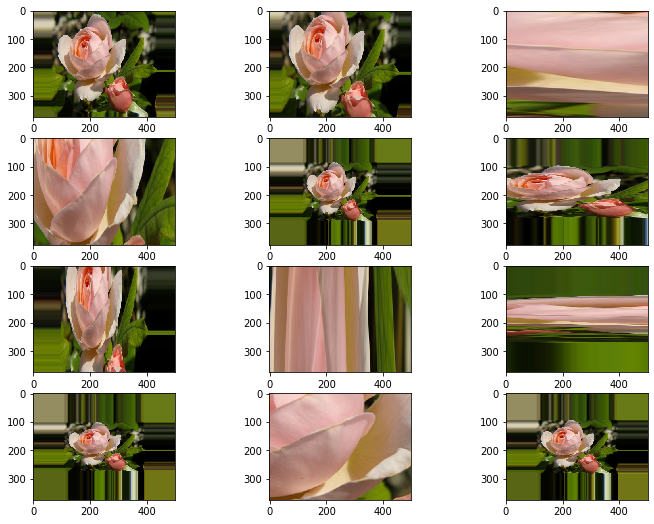

In [11]:
#과제 1
# zoom_range
## zoom_range=0.2 : +-20% 이내에서 random 
## zoom_range=[0.8,1.2] : 80% ~ 120% --> 100% 로 random
datagen = keras.preprocessing.image.ImageDataGenerator(zoom_range=1.2) # zoom_range=[0.8,1.2]
k_image_process(datagen, batch_image)

1
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)
(1, 375, 500, 3)


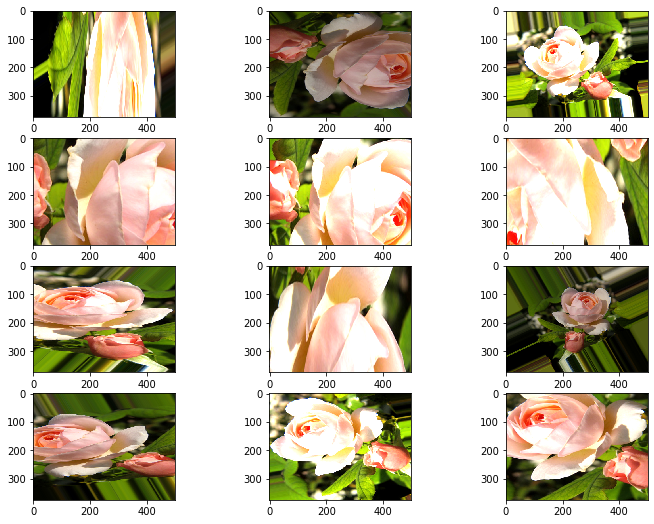

In [12]:
#과제 2
# create image data augmentation generator
datagen = keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.5,2.0], zoom_range=0.8, rotation_range=180, horizontal_flip=True)
k_image_process(datagen, batch_image)